In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 種子の概要
- y : 種子数
- x : 体サイズ
- f : 施肥処理の有無　C：処理なし　T：処理あり

In [2]:
sed = pd.read_csv("data/data3a.csv")
print(sed.head())
print(".......")
print(sed.tail(2))

    y      x  f
0   6   8.31  C
1   6   9.44  C
2   6   9.50  C
3  12   9.07  C
4  10  10.16  C
.......
    y      x  f
98  7  10.86  T
99  9   9.97  T


In [3]:
print(sed.describe())

                y           x
count  100.000000  100.000000
mean     7.830000   10.089100
std      2.624881    1.008049
min      2.000000    7.190000
25%      6.000000    9.427500
50%      8.000000   10.155000
75%     10.000000   10.685000
max     15.000000   12.400000


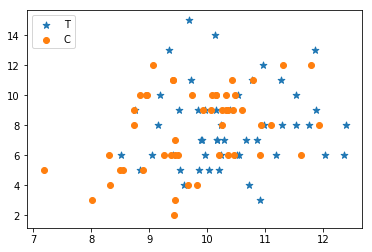

In [4]:
plt.scatter(sed.x[sed.f=='T'], sed.y[sed.f=='T'], label='T', marker='*', s=50)
plt.scatter(sed.x[sed.f=='C'], sed.y[sed.f=='C'], label='C')
plt.legend(loc='upper left')
plt.show()

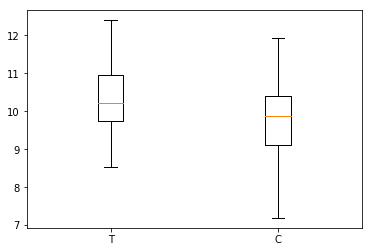

In [5]:
plt.boxplot([sed.x[sed.f=='T'], sed.x[sed.f=='C']], labels=['T', 'C'])
plt.show()

## ポアソン回帰の統計モデル
$$ \lambda_i = exp(\beta_1 + \beta_2x_i) $$

$$ \log \lambda_i = \beta_1 + \beta_2 x_i $$

$$ \log L(\beta_1 , \beta_2) = \sum_i\log \frac{\lambda_i^{y_i} exp(-\lambda_i)}{y_i!} $$

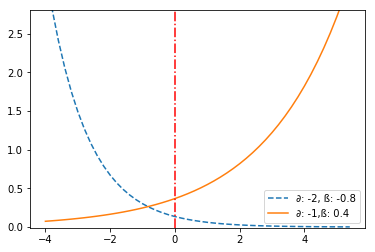

In [6]:
import numpy as np
x_img = np.arange(-4, 5.5, 0.2)
lambda_img1 = np.exp(-2+(-0.8)*x_img)
lambda_img2 = np.exp(-1+(0.4)*x_img)
plt.plot(x_img, lambda_img1, '--', label='∂: -2, ß: -0.8')
plt.plot(x_img, lambda_img2, label='∂: -1,ß: 0.4')
plt.axvline(x=0, linestyle='dashdot', color='r')
plt.ylim(-0.01, 2.8)
plt.legend()
plt.show()

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
fit = smf.glm(formula="y ~ x", data=sed, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(fit.summary())
print(fit.params)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 21 May 2018   Deviance:                       84.993
Time:                        21:39:50   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.0

### 最大対数尤度

In [9]:
alpha, beta = fit.params
lambda1 = np.exp(alpha + beta*sed.x) # fit.predict(sed.x)
lambda1.describe()

count    100.000000
mean       7.830000
std        0.598487
min        6.269709
25%        7.426269
50%        7.846501
75%        8.167561
max        9.299202
Name: x, dtype: float64

In [10]:
from scipy import stats
prof = stats.poisson.logpmf(sed.y, lambda1)
logLik_x = np.sum(prof)
logLik_x

-235.38625076986079

### ポアソン回帰モデルによる予測

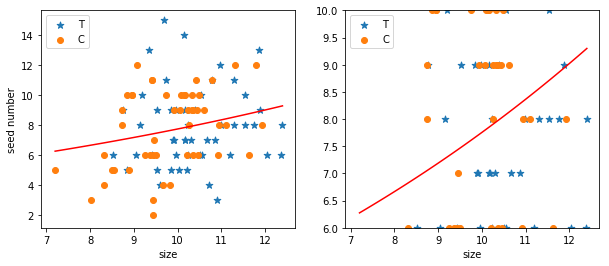

In [11]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

# 左の図
axL.scatter(sed.x[sed.f=='T'], sed.y[sed.f=='T'], label='T', marker='*', s=50)
axL.scatter(sed.x[sed.f=='C'], sed.y[sed.f=='C'], label='C')
x_img2 = np.arange(7.2, 12.5, 0.1)
axL.plot(x_img2, np.exp(alpha + beta*x_img2), color='r')
axL.legend(loc='upper left')
axL.set_xlabel('size')
axL.set_ylabel('seed number')

# 右の図
axR.scatter(sed.x[sed.f=='T'], sed.y[sed.f=='T'], label='T', marker='*', s=50)
axR.scatter(sed.x[sed.f=='C'], sed.y[sed.f=='C'], label='C')
# x_img2 = np.arange(7.2, 12.5, 0.1)
axR.plot(x_img2, np.exp(alpha + beta*x_img2), color='r')
axR.legend(loc='upper left')
axR.set_ylim(6, 10)
axR.set_xlabel('size')
axL.set_ylabel('seed number')


# fig.show()
plt.show()

## 説明変数が因子型の統計モデル

In [12]:
fit_fix = smf.glm(formula="y~f", data= sed, family = sm.families.Poisson()).fit()
print(fit_fix.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Mon, 21 May 2018   Deviance:                       89.475
Time:                        21:39:51   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.8

In [13]:
prof_fix = stats.poisson.logpmf(sed.y, fit_fix.predict(sed.f))
logLik_fix = np.sum(prof_fix)
logLik_fix

-237.62725696068682

## 説明変数が数量型＋因子型の統計モデル

In [14]:
fit_all = smf.glm(formula='y~x+f', data = sed, family=sm.families.Poisson()).fit()
print(fit_all.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Mon, 21 May 2018   Deviance:                       84.808
Time:                        21:39:51   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.6

In [15]:
prof_all = stats.poisson.logpmf(sed.y, fit_all.predict(sed.loc[:,['x', 'f']]))
logLik_all = np.sum(prof_all)
logLik_all

-235.29371924249367

In [16]:
print("logLik_f : " + str(logLik_fix))
print("logLik_x : " + str(logLik_x))
print("logLik_all : " + str(logLik_all))

logLik_f : -237.627256961
logLik_x : -235.38625077
logLik_all : -235.293719242


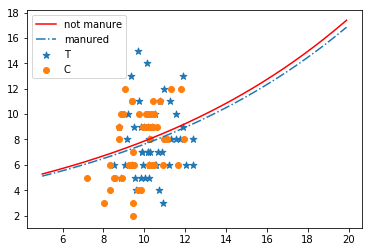

In [17]:
plt.scatter(sed.x[sed.f=='T'], sed.y[sed.f=='T'], label='T', marker='*', s=50)
plt.scatter(sed.x[sed.f=='C'], sed.y[sed.f=='C'], label='C')
alpha, beta2, beta1 = fit_all.params
x_img3 = np.arange(5, 20, 0.1)
y_nf = np.exp(alpha + beta1*x_img3)
y_f = np.exp(alpha + beta1*x_img3 + beta2)
plt.plot(x_img3, y_nf, color='r', label='not manure')
plt.plot(x_img3, y_f, label='manured', linestyle='dashdot')
plt.legend(loc='upper left')
# plt.ylim(4, 16)
plt.show()